#### What is Classification?

The predictions or outputs, 𝑐(𝑥) are categorical while 𝑥 can take any set of values (real or categorical). The goal is select correct class for a new instance.

#### what is Random Forest Tree and why?

Random forest algorithm is a supervised classification algorithm. As the name suggest, this algorithm creates the forest with a number of trees.

In general, the more trees in the forest the more robust the forest looks like. In the same way in the random forest classifier, the higher the number of trees in the forest gives the high accuracy results.


#### Data Set Informtaion:::

Loan Id:
Gender:
Married:
Dependant:
Education:
Self_Employed:
ApplicantIncome:
CoApplicantIncome:
Loan_Amount:
Loan_Amount_Term:
Credit_History:
Property_Area:
Loan_Status:

#### Lets Start Now... 
Import all the libraries required.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

Import the Data Set from the datapath

In [2]:
df=pd.read_csv("C:\\Users\\vragha2x\\Desktop\\Other Docs\\PDS\\Python\\train.csv")

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Out of these columns, (Gender,Male,Dependants,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History) column has Null vallues. 

So we will drop the rows that contains null values..

In [6]:
d=df.dropna()

In [7]:
print("before",df.shape[0])
print("after",d.shape[0])
df.shape[0]-d.shape[0]

before 614
after 480


134

df.shape[0]- tells us the shape of the data set before dropping the null values....
d.shape[0] - tells us the shape of the data set after dropping the null values

Here 0 indicates rows and 1 indicates the columns.

134 rows of null values has been dropped for better results

In [8]:
d.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Univariate Analysis

1.Dependants

In [9]:
d.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In the 'Dependants' column, there are only 4 unique values.. ['1','0','2','3+']

2.Applicant Income

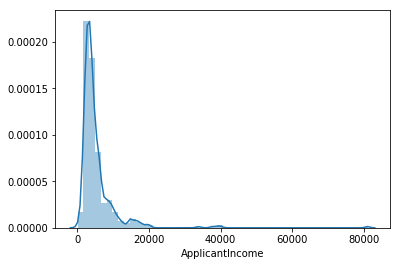

In [10]:
sns.distplot(d.ApplicantIncome)

3.CoApplicant Income

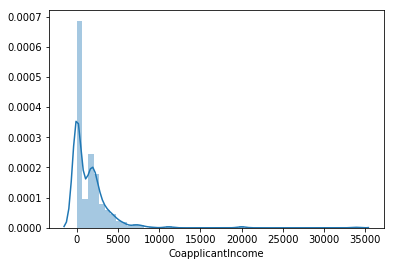

In [11]:
sns.distplot(d.CoapplicantIncome)

4.Loan Amount

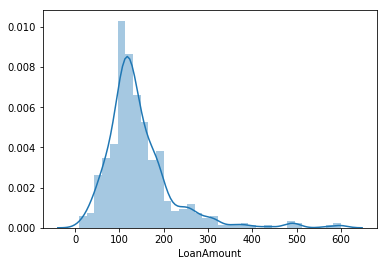

In [12]:
sns.distplot(d.LoanAmount)

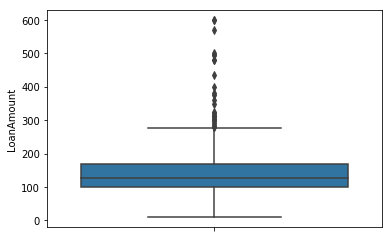

In [13]:
sns.boxplot(y=d.LoanAmount)

The box in the boxplot covers 25% to 75% ie 50% of the data. 

In [14]:
d.LoanAmount.mean()

144.73541666666668

In [15]:
d.LoanAmount.describe()

count    480.000000
mean     144.735417
std       80.508164
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64

5.Loan Amount term

In [16]:
d.Loan_Amount_Term.unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [17]:
d.Loan_Amount_Term.value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: Loan_Amount_Term, dtype: int64

Majority(85%) of the applicants has gone for 360 months loan term...


Considering Loan_Amount_Term Variable(Looks descrete) is not recommended.. Bcos most of the people are falling under 360

6.Credit History

In [18]:
d.Credit_History.unique()
#d['Credit_History'].unique()

array([1., 0.])

7.Property Area

In [19]:
d.Property_Area.unique()
#d['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

8.Loan Status(Target Variable)

In [20]:
d.Loan_Status.unique()

array(['N', 'Y'], dtype=object)

In [21]:
d.Loan_Status.value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

#### MultiVariate Analysis

In [22]:
# H0:Applicant income is very important. So that may impact the loan status
d.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5730.189189
Y    5201.093373
Name: ApplicantIncome, dtype: float64

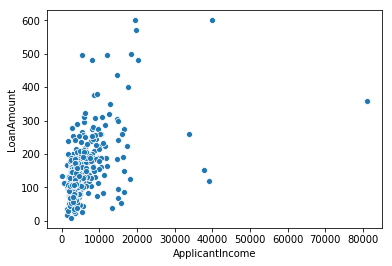

In [23]:
sns.scatterplot(d.ApplicantIncome,d.LoanAmount)

It is found that there are few outliars.. 

And Also if we observe the graph carefully, Loan Amount has been given to the person whose Applicant Income is < 30000..

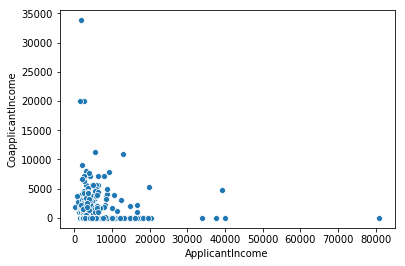

In [24]:
sns.scatterplot(d.ApplicantIncome,d.CoapplicantIncome)

In [25]:
# H0: Self Employed is related to Loan Status
d.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              289
               N              125
Yes            Y               43
               N               23
Name: Loan_Status, dtype: int64

In [26]:
d.groupby('Self_Employed')['Loan_Status'].count()

Self_Employed
No     414
Yes     66
Name: Loan_Status, dtype: int64

In [27]:
d.groupby('Self_Employed')['Loan_Status'].value_counts()/d.groupby('Self_Employed')['Loan_Status'].count()
# To know the probability, we can divide by counts()

Self_Employed  Loan_Status
No             Y              0.698068
               N              0.301932
Yes            Y              0.651515
               N              0.348485
Name: Loan_Status, dtype: float64

In [28]:
#H0: Education and Loan Status are related to each other.. 
d.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              271
              N              112
Not Graduate  Y               61
              N               36
Name: Loan_Status, dtype: int64

In [29]:
d.groupby('Education')['Loan_Status'].count()

Education
Graduate        383
Not Graduate     97
Name: Loan_Status, dtype: int64

In [30]:
d.groupby('Education')['Loan_Status'].value_counts()/d.groupby('Education')['Loan_Status'].count()

Education     Loan_Status
Graduate      Y              0.707572
              N              0.292428
Not Graduate  Y              0.628866
              N              0.371134
Name: Loan_Status, dtype: float64

In [31]:
#H0: Education and Self Employed are related to each other
d.groupby('Education')['Self_Employed'].value_counts()/d.groupby('Education')['Loan_Status'].count()

Education     Self_Employed
Graduate      No               0.861619
              Yes              0.138381
Not Graduate  No               0.865979
              Yes              0.134021
dtype: float64

In [32]:
#H0: Gender and Loan status are related to each other. 
d.groupby('Gender')['Loan_Status'].value_counts()/d.groupby('Gender')['Loan_Status'].count()

Gender  Loan_Status
Female  Y              0.627907
        N              0.372093
Male    Y              0.705584
        N              0.294416
Name: Loan_Status, dtype: float64

In [33]:
#H0: Married and Loan status are related to each other. 
d.groupby('Married')['Loan_Status'].value_counts()/d.groupby('Married')['Loan_Status'].count()


Married  Loan_Status
No       Y              0.621302
         N              0.378698
Yes      Y              0.729904
         N              0.270096
Name: Loan_Status, dtype: float64

In [34]:
#H0: Dependants and Loan Status are related to each other. 
d.groupby('Dependents')['Loan_Status'].value_counts()/d.groupby('Dependents')['Loan_Status'].count()

Dependents  Loan_Status
0           Y              0.682482
            N              0.317518
1           Y              0.650000
            N              0.350000
2           Y              0.764706
            N              0.235294
3+          Y              0.682927
            N              0.317073
Name: Loan_Status, dtype: float64

In [35]:
# To find the mean of the Applicant Income who has Dependants

d.groupby('Dependents')['ApplicantIncome'].mean()

Dependents
0     4768.167883
1     6267.837500
2     5151.529412
3+    8025.512195
Name: ApplicantIncome, dtype: float64

In [36]:
#H0: Property Area and Loan Status are related to each other. 
d.groupby('Property_Area')['Loan_Status'].value_counts()/d.groupby('Property_Area')['Loan_Status'].count()

Property_Area  Loan_Status
Rural          Y              0.611511
               N              0.388489
Semiurban      Y              0.780105
               N              0.219895
Urban          Y              0.653333
               N              0.346667
Name: Loan_Status, dtype: float64

#### Data Cleaning 

In [37]:
d.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
#Making the Data set ordinal:::

def datacleaning(x):
    x.Gender=x.Gender.map(lambda x:1 if x=='Male' else 0) #Assigning 1 if Gender is 'Male' and 0 if Gemder is 'Female'
    x.Married=x.Married.map(lambda x:1 if x=='Yes' else 0) #Assigning 1 if Married is 'Yes' and 0 if Married is 'No'
    x.Dependents=x.Dependents.map(lambda x:3 if x=='3+' else int(x)) #Assigning 3 if Dependents is '3+'' and same values if other than '3+'
    x.Education=x.Education.map(lambda x:1 if x=='Graduate' else 0) #Assigning 1 if Education is 'Graduate' and o if education is 'Not graduate'
    x.Self_Employed=x.Self_Employed.map(lambda x:1 if x=='Yes' else 0) #Assigning 1 if SelfEmployed is 'Yes' and 0 if selfEmployed is 'No'
    dummies=pd.get_dummies(x.Property_Area) #Get Dummies will create columns(=Unique values) and assign 1 and 0. 
    #x=x.join(dummies) #Joining dummies to the dataset
    x["TotalIncome"]=x.ApplicantIncome+x.CoapplicantIncome
    y=x.Loan_Status.map(lambda x:1 if x=='Y' else 0) #Assigning 1 if the Loan status is 'Y' and 0 if the Loan Status is 'N'
    x=x.drop(['Loan_ID','LoanAmount','Loan_Amount_Term','Property_Area','Loan_Status','ApplicantIncome','CoapplicantIncome'],axis=1) #Dropping the unwanted columns from the dataset
    return x,y
   

In [39]:
X,y=datacleaning(d.copy())

In [40]:
X.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,TotalIncome
1,1,1,1,1,0,1.0,6091.0
2,1,1,0,1,1,1.0,3000.0
3,1,1,0,0,0,1.0,4941.0
4,1,0,0,1,0,1.0,6000.0
5,1,1,2,1,1,1.0,9613.0
6,1,1,0,0,0,1.0,3849.0
7,1,1,3,1,0,0.0,5540.0
8,1,1,2,1,0,1.0,5532.0
9,1,1,1,1,0,1.0,23809.0
10,1,1,2,1,0,1.0,3900.0



#### Entropy

If the sample is completely homogeneous, the Entropy = 0

If the sample is equally divided, the Entropy = 1

In [41]:
#Testing Entropy
entropy = -0.55*m.log2(0.55)-0.45*m.log2(0.45)
print(entropy)

0.9927744539878084


In [42]:
#In Other Way... 

def entropy(p,q):
    e=-p*m.log2(p)-q*m.log2(q)
    return e

In [43]:
y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [44]:
y.value_counts()/len(y)

1    0.691667
0    0.308333
Name: Loan_Status, dtype: float64

In [45]:
d.groupby('Gender')['Loan_Status'].value_counts()/d.groupby('Gender')['Loan_Status'].count()

Gender  Loan_Status
Female  Y              0.627907
        N              0.372093
Male    Y              0.705584
        N              0.294416
Name: Loan_Status, dtype: float64

In [46]:
entropy(0.627907,0.372093)

0.9522656078811393

In [47]:
entropy(0.705584,0.294416)

0.8743575689381475

### Decision Tree Model

In [48]:
d.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            603, 604, 606, 607, 608, 609, 610, 611, 612, 613],
           dtype='int64', length=480)

In [49]:
df.index

RangeIndex(start=0, stop=614, step=1)

In [50]:
test_index=df.index.difference(d.index)

In [51]:
test=df.loc[test_index]

In [52]:
test.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
d.Credit_History.value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [54]:
test.Gender=test.Gender.fillna("Male")
test.Married=test.Married.fillna("Yes")
test.Dependents=test.Dependents.fillna("0")
test.Self_Employed=test.Self_Employed.fillna("No")
test.LoanAmount=test.LoanAmount.fillna(d.LoanAmount.median())
test.Loan_Amount_Term=test.Loan_Amount_Term.fillna(d.Loan_Amount_Term.median())
test.Credit_History=test.Credit_History.fillna(1)

In [55]:
X_test,y_test=datacleaning(test)

In [56]:
dct=DecisionTreeClassifier(criterion="entropy")
dct.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

.Score() gives returns the mean accuracy on the given test/train data and labels.

In [57]:
print("accuracy train",dct.score(X,y))
print("accuracy test",dct.score(X_test,y_test))

accuracy train 0.9916666666666667
accuracy test 0.6417910447761194


Accuracy is 64% for the Test Data set... 

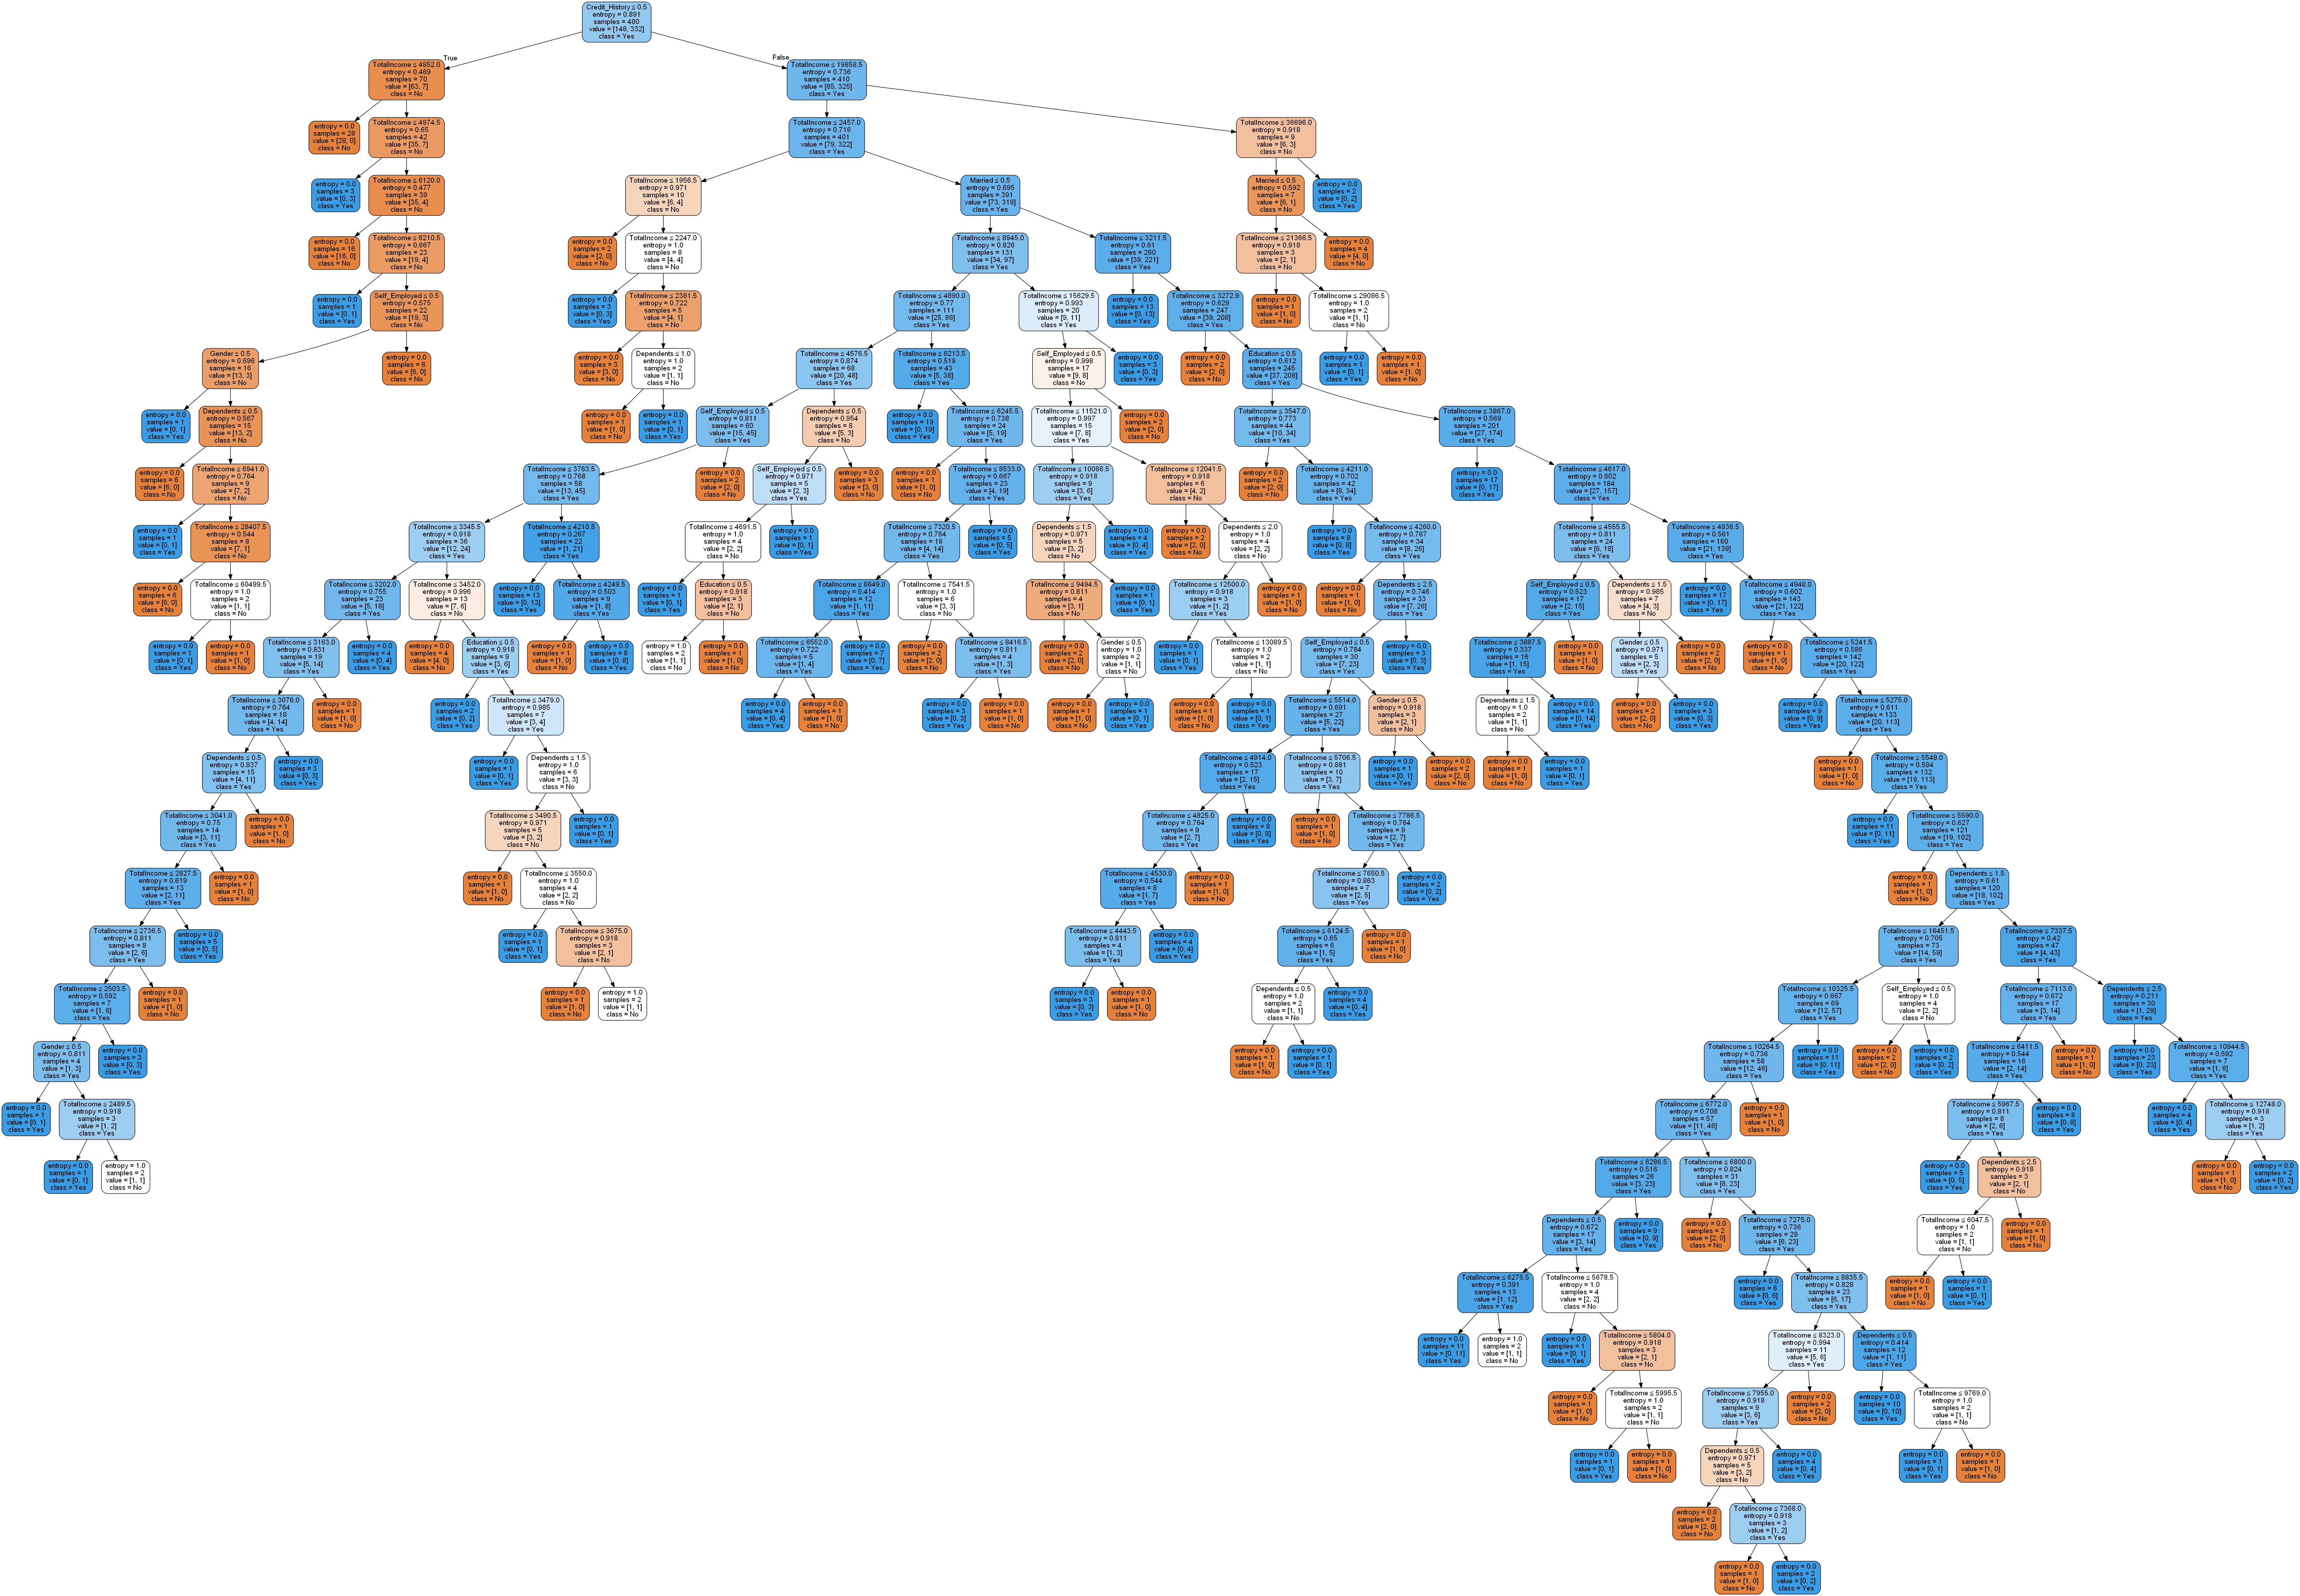

In [58]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dct, out_file=dot_data,  feature_names =X.columns,class_names=["No","Yes"],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [60]:
for height in range(1,6):
    for leaf in range(1,5):
        dc=DecisionTreeClassifier(criterion="entropy",max_depth=height,min_samples_leaf=leaf)
        dc.fit(X,y)
        print('depth',height,"leaf",leaf,"accuracy train",dc.score(X,y))
        print('depth',height,"leaf",leaf,"accuracy test",dc.score(X_test,y_test))

depth 1 leaf 1 accuracy train 0.8083333333333333
depth 1 leaf 1 accuracy test 0.8134328358208955
depth 1 leaf 2 accuracy train 0.8083333333333333
depth 1 leaf 2 accuracy test 0.8134328358208955
depth 1 leaf 3 accuracy train 0.8083333333333333
depth 1 leaf 3 accuracy test 0.8134328358208955
depth 1 leaf 4 accuracy train 0.8083333333333333
depth 1 leaf 4 accuracy test 0.8134328358208955
depth 2 leaf 1 accuracy train 0.8145833333333333
depth 2 leaf 1 accuracy test 0.7910447761194029
depth 2 leaf 2 accuracy train 0.8145833333333333
depth 2 leaf 2 accuracy test 0.7910447761194029
depth 2 leaf 3 accuracy train 0.8145833333333333
depth 2 leaf 3 accuracy test 0.7910447761194029
depth 2 leaf 4 accuracy train 0.8145833333333333
depth 2 leaf 4 accuracy test 0.7910447761194029
depth 3 leaf 1 accuracy train 0.8291666666666667
depth 3 leaf 1 accuracy test 0.7835820895522388
depth 3 leaf 2 accuracy train 0.8291666666666667
depth 3 leaf 2 accuracy test 0.7835820895522388
depth 3 leaf 3 accuracy train 

In [61]:
dc=DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_leaf=3)
dc.fit(X,y)
dc.score(X_test,y_test)

0.7835820895522388

In [64]:
dct=DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_leaf=3,\
                           max_features=None,random_state=31)
dct.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=31,
            splitter='best')

In [65]:

for i,j in zip(X.columns,dct.feature_importances_):
    print(i,j)

Gender 0.0
Married 0.03632840763985009
Dependents 0.008694674621666862
Education 0.009452849711864442
Self_Employed 0.0
Credit_History 0.7066081432623232
TotalIncome 0.23891592476429546


In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion="entropy",n_estimators=5,\
                           max_depth=5,random_state=33,max_features=None)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

In [68]:
rfc.score(X,y)

0.8375

In [69]:
rfc.score(X_test,y_test)

0.7835820895522388

In [70]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1067342868, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=814680455, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fr

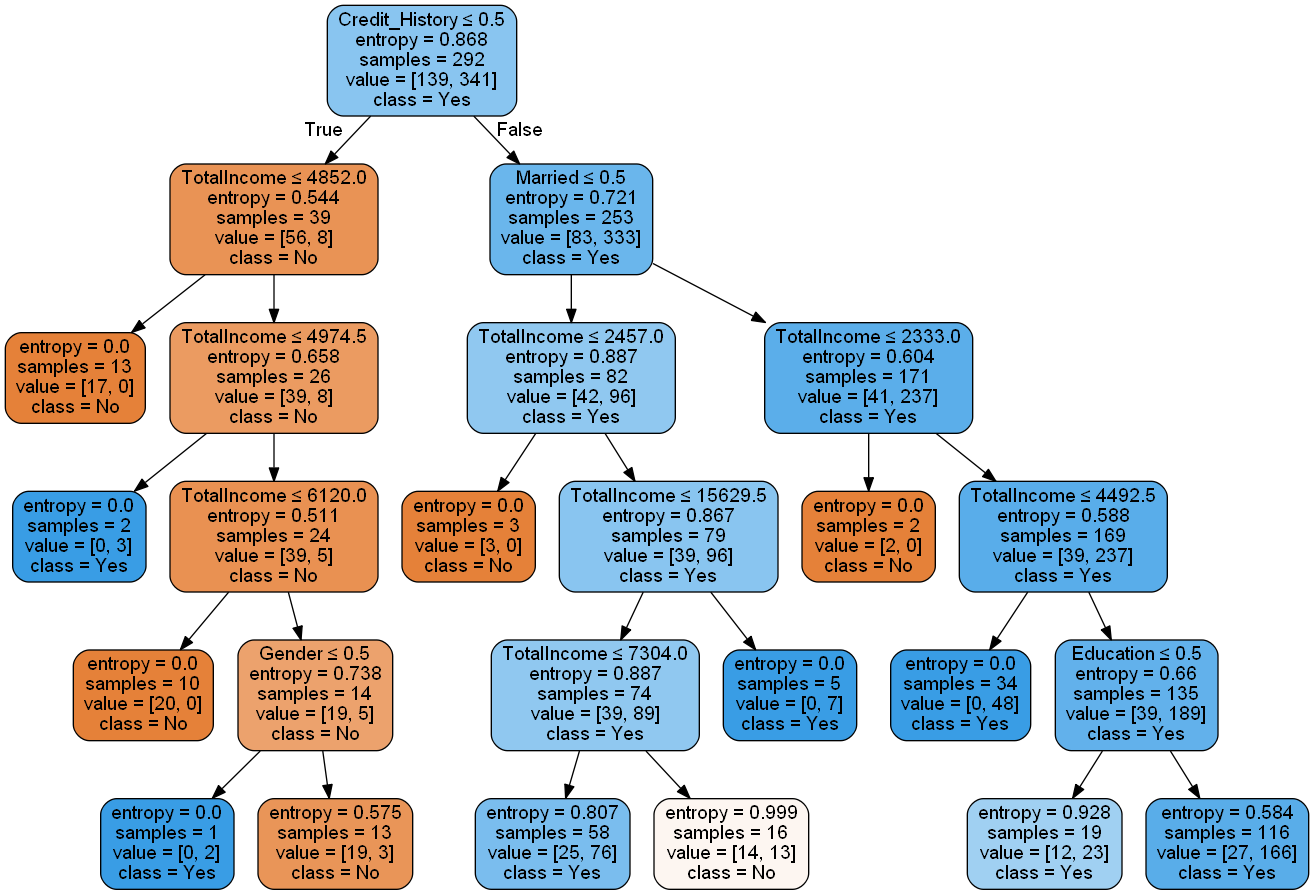

In [71]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(rfc.estimators_[0], out_file=dot_data,  feature_names =X.columns,class_names=["No","Yes"],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

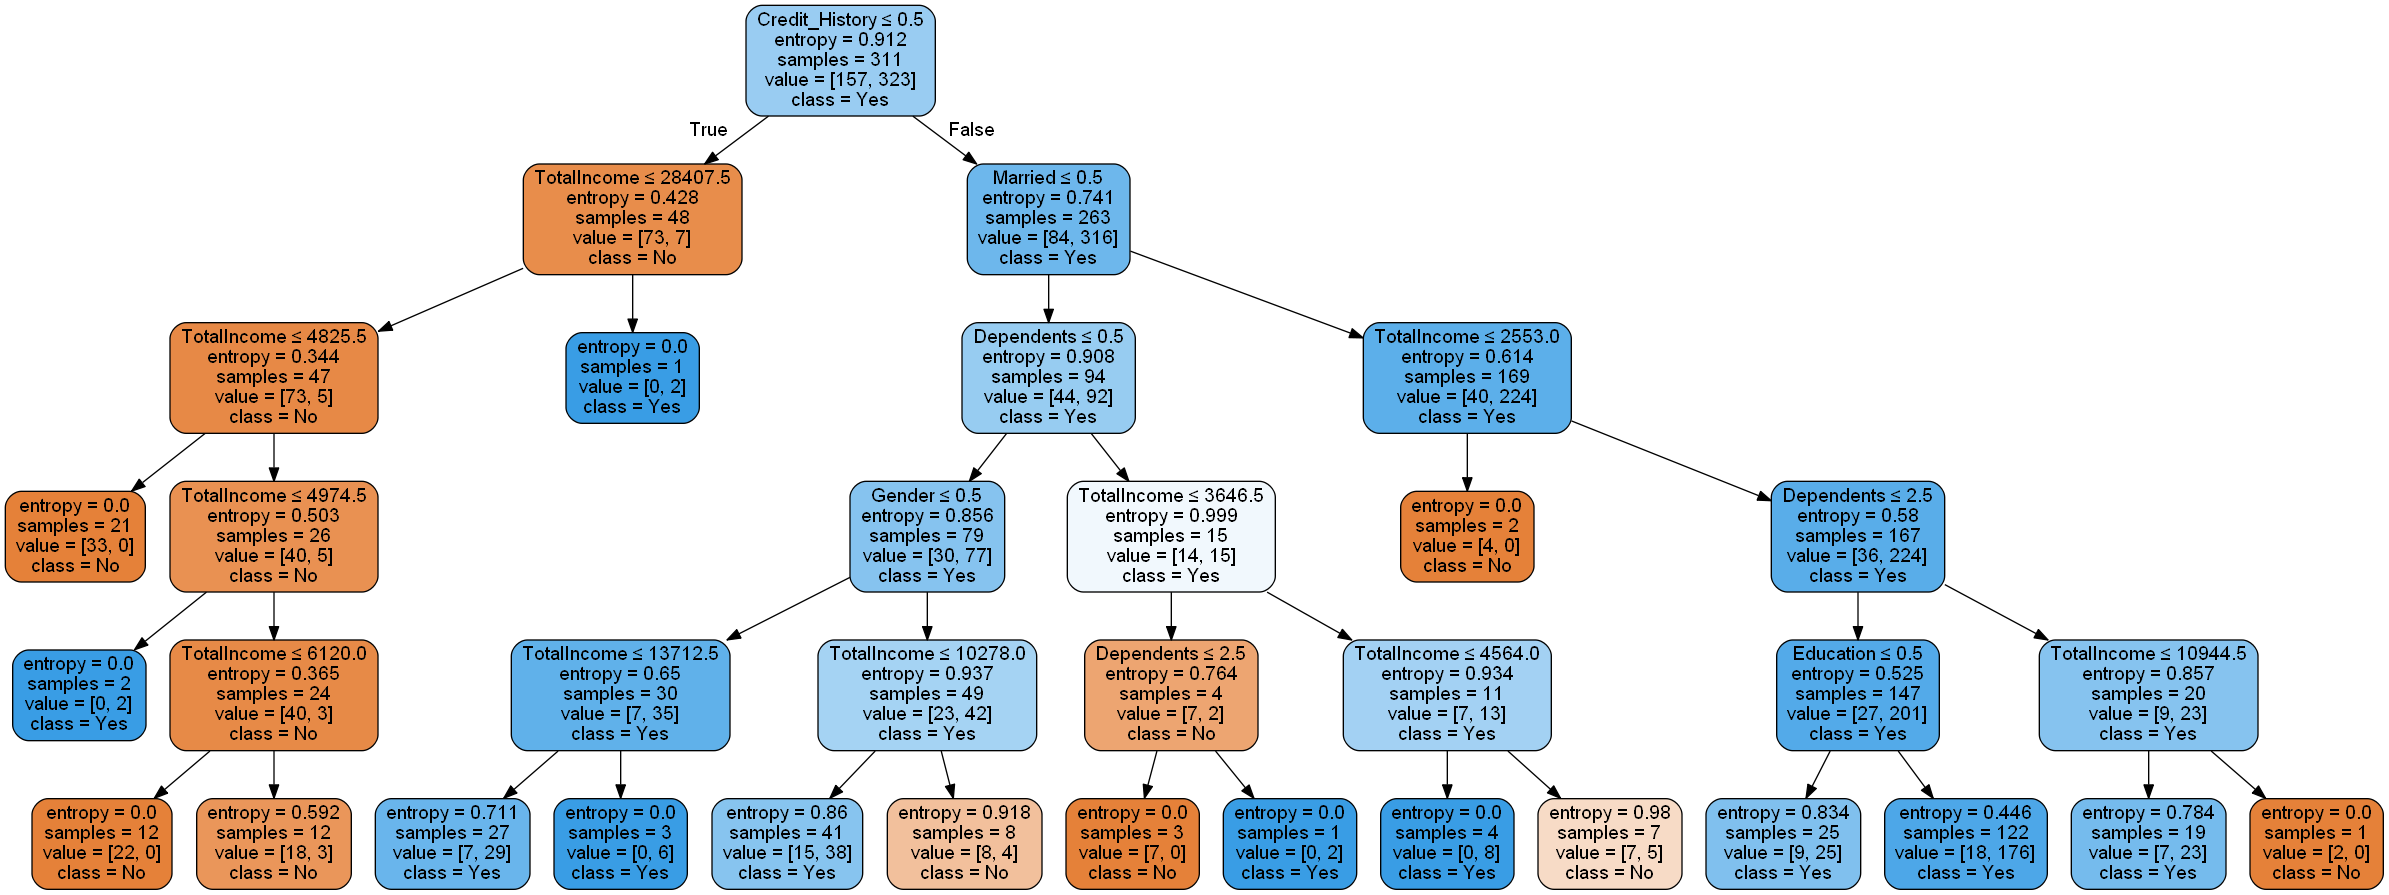

In [72]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(rfc.estimators_[1], out_file=dot_data,  feature_names =X.columns,class_names=["No","Yes"],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())